
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zjelveh/zjelveh.github.io/blob/master/files/cfc/8_datetime_operations_solutions.ipynb)

**IMPORTANT**: Save your own copy!
1. Click File → Save a copy in Drive
2. Rename it
3. Work in YOUR copy, not the original


---


# 8. Datetime Operations with Pandas - SOLUTIONS
## CCJS 418E: Coding for Criminology

Today's Goals:
- Convert string dates to datetime objects
- Extract year, month, day from dates
- Filter data by date ranges
- Create time period indicators
- Use `.iloc` for position-based indexing
- Aggregate data by time periods

Last class: We learned about groupby operations for aggregating data
Today: We learn to work with dates and analyze time-based patterns

**Research Context:**

In December 2014, NYPD officers reduced enforcement activities following political tensions in New York City. This created a natural experiment to study:
- Which arrests depend on officer-initiated contact vs. citizen complaints
- How enforcement patterns change during pullback periods
- Whether different arrest types respond differently to policy changes

**Key Research Question:** When police reduce enforcement, which types of arrests change most? What does this reveal about discretionary vs. mandatory policing activities?


## Setup: Import Libraries and Load Data

We'll use NYPD arrest data from 2013-2015 to analyze enforcement patterns.

In [1]:
# First, import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/zjelveh/zjelveh.github.io/refs/heads/master/files/cfc/nypd_arrests_2013_2015_garner.csv')

print(f"Loaded {len(df):,} arrest records")
print(f"\nColumns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()

Loaded 1,026,807 arrest records

Columns: ['ARREST_KEY', 'ARREST_DATE', 'PD_DESC', 'OFNS_DESC', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE']

First few rows:


,ARREST_KEY,ARREST_DATE,PD_DESC,OFNS_DESC,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,AGE_GROUP,PERP_SEX,PERP_RACE
0,148725946,2015-12-21,NaN,NaN,M,K,61,45-64,M,WHITE
1,148630763,2015-12-17,NaN,NaN,M,M,28,18-24,M,BLACK
2,148445695,2015-12-10,JOSTLING,JOSTLING,M,K,81,25-44,M,BLACK
3,148429830,2015-12-10,SODOMY 3,SEX CRIMES,F,B,42,25-44,M,BLACK
4,147917492,2015-11-19,RAPE 1,RAPE,F,B,44,45-64,M,BLACK


---

## Part 1: Understanding Datetime Objects

**Problem**: Our ARREST_DATE column is stored as text, not as a datetime object.

**Why this matters**: You can't do date math on "12/03/2014" - Python sees it as text. But datetime objects allow:

- **Filtering by date ranges**
```python
df[df['ARREST_DATE'] >= pd.to_datetime('2014-01-01')]
```

- **Extracting year, month, day**
```python
df['ARREST_DATE'].dt.year
```

- **Calculating time differences**
```python
(end_date - start_date).days
```

- **Sorting chronologically**
```python
df.sort_values('ARREST_DATE')
```


### Check the data type

Let's first examine what type ARREST_DATE currently is.

In [2]:
# Check the data type of ARREST_DATE
print(f"Data type: {df['ARREST_DATE'].dtype}")
print(f"\nFirst few dates:")
print(df['ARREST_DATE'].head())

# It's currently 'object' which means text/string

Data type: object

First few dates:
0    2015-12-21
1    2015-12-17
2    2015-12-10
3    2015-12-10
4    2015-11-19
Name: ARREST_DATE, dtype: object


### String vs Datetime: The Problem

When dates are stored as strings, Python can't understand them as dates.

In [3]:
# Let's see the problem with string dates
print("As a string (current state):")
print(f"  First value: {df['ARREST_DATE'].head(1).values[0]}")
print(f"  Type: {type(df['ARREST_DATE'].head(1).values[0])}")

# Try to filter by date - THIS WON'T WORK CORRECTLY:
# String comparison gives wrong results
print("\nString comparison problem:")
print("  '2015-12-01' > '2015-02-01':", '2015-12-01' > '2015-02-01')  # Correct
print("  '2015-2-01' > '2015-12-01':", '2015-2-01' > '2015-12-01')   # WRONG! (string comparison)

print("\nWe need to convert to datetime to do date operations properly!")

As a string (current state):
  First value: 2015-12-21
  Type: <class 'str'>

String comparison problem:
  '2015-12-01' > '2015-02-01': True
  '2015-2-01' > '2015-12-01': True

We need to convert to datetime to do date operations properly!


### Converting to Datetime

Use `pd.to_datetime()` to convert strings to datetime objects.

In [4]:
# Convert ARREST_DATE to datetime
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

# Check the result
print(f"Data type after conversion: {df['ARREST_DATE'].dtype}")
print(f"\nFirst few dates:")
print(df['ARREST_DATE'].head())

# Now it's datetime64[ns] - a proper datetime object!

Data type after conversion: datetime64[ns]

First few dates:
0   2015-12-21
1   2015-12-17
2   2015-12-10
3   2015-12-10
4   2015-11-19
Name: ARREST_DATE, dtype: datetime64[ns]


### The .dt Accessor: Your Gateway to Date Components

Once a column is datetime, you can use the `.dt` accessor to extract parts of the date.

**Think of `.dt` as unlocking date-specific operations:**

```python
df['date_column'].dt.year        # Extract year (2014, 2015, etc.)
df['date_column'].dt.month       # Extract month (1-12)
df['date_column'].dt.day         # Extract day (1-31)
df['date_column'].dt.day_name()  # Day of week ('Monday', 'Tuesday', etc.)
df['date_column'].dt.to_period('M')  # Convert to monthly period (2014-01, 2014-02, etc.)
```

**Important**: `.dt` ONLY works on datetime columns, not strings!

In [5]:
# Examples of .dt accessor
# Show on the whole column first
df['ARREST_DATE'].dt.year.head()

df['ARREST_DATE'].dt.month.head()

df['ARREST_DATE'].dt.day.head()

df['ARREST_DATE'].dt.day_name().head()


0    2015
1    2015
2    2015
3    2015
4    2015
Name: ARREST_DATE, dtype: int32

0    12
1    12
2    12
3    12
4    11
Name: ARREST_DATE, dtype: int32

0    21
1    17
2    10
3    10
4    19
Name: ARREST_DATE, dtype: int32

0      Monday
1    Thursday
2    Thursday
3    Thursday
4    Thursday
Name: ARREST_DATE, dtype: object

### 🎯 QUICK CHECK #1
Extract the year, month, and day of week from ARREST_DATE.
Store them in new columns called 'year', 'month', and 'day_of_week'.

Use the `.dt` accessor!

In [6]:
# Your code here:




<details>
<summary>Click for solution</summary>

```python
# Extract date components using .dt
df['year'] = df['ARREST_DATE'].dt.year
df['month'] = df['ARREST_DATE'].dt.month
df['day_of_week'] = df['ARREST_DATE'].dt.day_name()

print(df[['ARREST_DATE', 'year', 'month', 'day_of_week']].head(10))
```
</details>

---

## Part 2: Understanding Time Periods

When analyzing trends over time, we often want to group dates into periods (months, quarters, years).

**The `.to_period()` method converts dates to time periods.**

### Why Use .to_period()?

Compare these two approaches:

**Bad approach** - Extract month as number:
```python
df['month'] = df['ARREST_DATE'].dt.month  # Returns 1, 2, 3, ...
# Problem: Can't tell which year! All Januarys become "1"
```

**Good approach** - Use periods:
```python
df['year_month'] = df['ARREST_DATE'].dt.to_period('M')  # Returns 2014-01, 2014-02, ...
# Each month is unique and sorts correctly!
```

<Axes: xlabel='month', ylabel='monthly_arrests'>

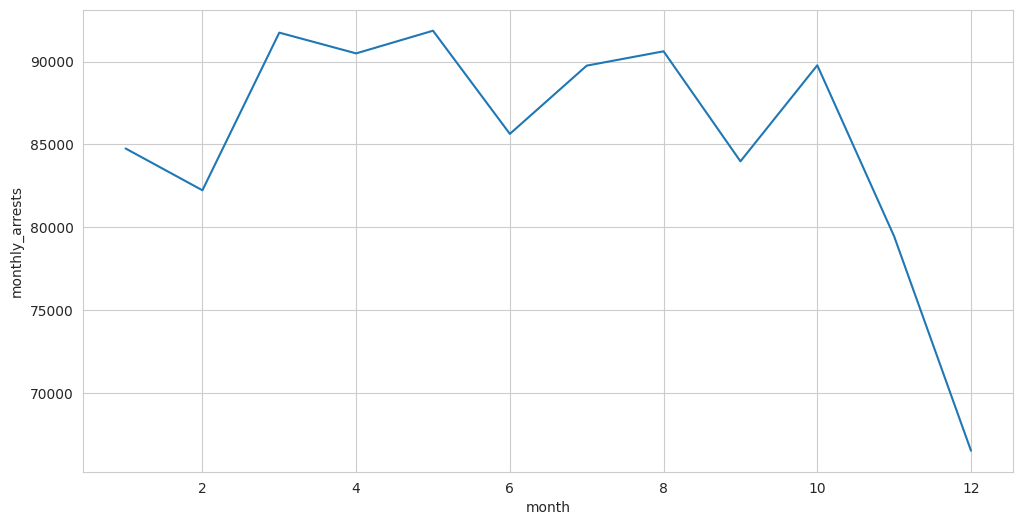

In [7]:
df['month'] = df['ARREST_DATE'].dt.month
monthly_arrests = df.groupby(['month']).size().reset_index(name='monthly_arrests')
sns.lineplot(monthly_arrests, x='month', y='monthly_arrests')

### Create Monthly Periods

In [8]:
# Create monthly period using .dt.to_period('M')
# This converts each date to its month: 2014-12-15 becomes 2014-12
df['year_month'] = df['ARREST_DATE'].dt.to_period('M').dt.to_timestamp()

print("Original date vs Monthly period:")
print(df[['ARREST_DATE', 'year_month']].head(10))

print(f"\nData type: {df['year_month'].dtype}")
print(f"Unique months: {df['year_month'].nunique()}")
print(f"Date range: {df['year_month'].min()} to {df['year_month'].max()}")

Original date vs Monthly period:
  ARREST_DATE year_month
0  2015-12-21 2015-12-01
1  2015-12-17 2015-12-01
2  2015-12-10 2015-12-01
3  2015-12-10 2015-12-01
4  2015-11-19 2015-11-01
5  2015-11-07 2015-11-01
6  2015-10-30 2015-10-01
7  2015-10-26 2015-10-01
8  2015-10-23 2015-10-01
9  2015-10-22 2015-10-01

Data type: datetime64[ns]
Unique months: 36
Date range: 2013-01-01 00:00:00 to 2015-12-01 00:00:00


In [9]:
monthly_arrests = df.groupby(['year_month']).size().reset_index(name='monthly_arrests')


<Axes: xlabel='year_month', ylabel='monthly_arrests'>

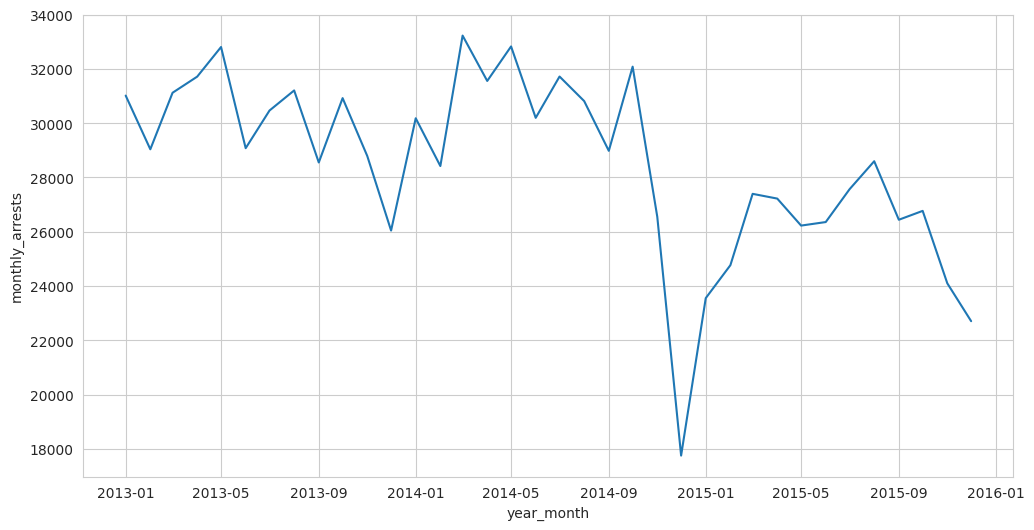

In [10]:
sns.lineplot(monthly_arrests, x='year_month', y='monthly_arrests')

### Other Period Types

You can create different time periods:

In [11]:
# Different period types
df['year_quarter'] = df['ARREST_DATE'].dt.to_period('Q')  # Quarterly
df['year_only'] = df['ARREST_DATE'].dt.to_period('Y')     # Yearly

print("Different period types:")
print(df[['ARREST_DATE', 'year_month', 'year_quarter', 'year_only']].head(10))

# Clean up demo columns
df = df.drop(columns=['year_quarter', 'year_only'])

Different period types:
  ARREST_DATE year_month year_quarter year_only
0  2015-12-21 2015-12-01       2015Q4      2015
1  2015-12-17 2015-12-01       2015Q4      2015
2  2015-12-10 2015-12-01       2015Q4      2015
3  2015-12-10 2015-12-01       2015Q4      2015
4  2015-11-19 2015-11-01       2015Q4      2015
5  2015-11-07 2015-11-01       2015Q4      2015
6  2015-10-30 2015-10-01       2015Q4      2015
7  2015-10-26 2015-10-01       2015Q4      2015
8  2015-10-23 2015-10-01       2015Q4      2015
9  2015-10-22 2015-10-01       2015Q4      2015


### 🎯 QUICK CHECK #2
How many unique quarters are in the dataset?

In [12]:
# Your code here:




<details>
<summary>Click for solution</summary>

```python
df['quarter'] = df['ARREST_DATE'].dt.to_period('Q')
print(f"Unique quarters: {df['quarter'].nunique()}")
print(f"\nQuarters in dataset:")
print(df['quarter'].unique())

# Clean up
df = df.drop(columns=['quarter'])
```
</details>

---

## Part 3: Exploratory Analysis - Finding the Pullback Period

Before we can study the pullback effect, we need to see it in the data!

Let's count arrests by month and visualize the trend to identify when enforcement dropped.

### Count Arrests by Month

In [13]:
# Count arrests by month using groupby
monthly_arrests = df.groupby('year_month').size()

print("Monthly arrests:")
print(monthly_arrests)

# Find the month with fewest arrests
min_month = monthly_arrests.idxmin()
min_arrests = monthly_arrests.min()

print(f"\nMonth with fewest arrests: {min_month} ({min_arrests:,} arrests)")

Monthly arrests:
year_month
2013-01-01    31018
2013-02-01    29039
2013-03-01    31123
2013-04-01    31717
2013-05-01    32809
2013-06-01    29080
2013-07-01    30468
2013-08-01    31208
2013-09-01    28553
2013-10-01    30925
2013-11-01    28793
2013-12-01    26044
2014-01-01    30183
2014-02-01    28422
2014-03-01    33230
2014-04-01    31558
2014-05-01    32830
2014-06-01    30198
2014-07-01    31721
2014-08-01    30816
2014-09-01    28982
2014-10-01    32085
2014-11-01    26551
2014-12-01    17750
2015-01-01    23553
2015-02-01    24767
2015-03-01    27397
2015-04-01    27222
2015-05-01    26227
2015-06-01    26357
2015-07-01    27568
2015-08-01    28599
2015-09-01    26442
2015-10-01    26769
2015-11-01    24099
2015-12-01    22704
dtype: int64

Month with fewest arrests: 2014-12-01 00:00:00 (17,750 arrests)


### Visualize the Trend

Let's plot monthly arrests to see the pullback visually using seaborn.


What do you notice about the pattern?
When do arrests drop dramatically?


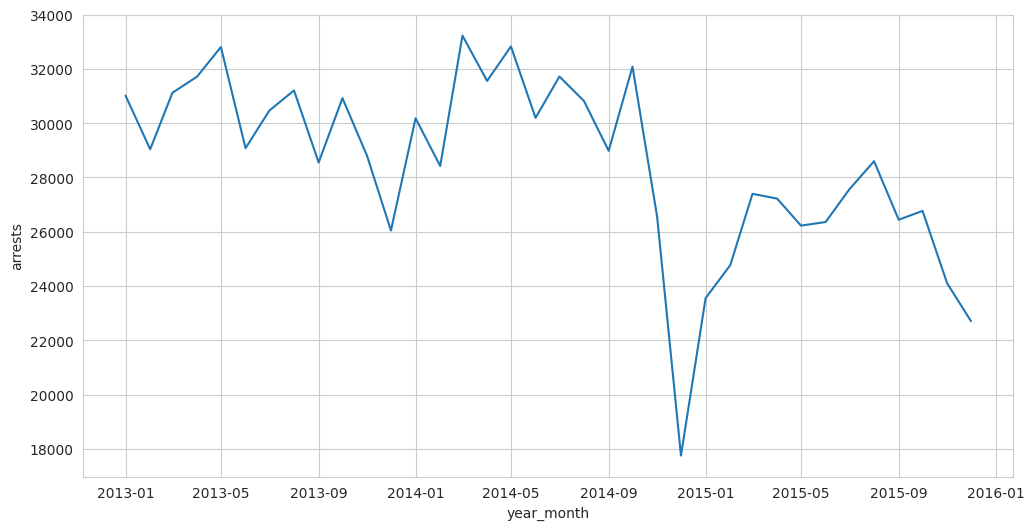

In [14]:
# Convert to DataFrame for seaborn
monthly_df = monthly_arrests.reset_index()
monthly_df.columns = ['year_month', 'arrests']

# Create the plot
sns.lineplot(data=monthly_df, x='year_month', y='arrests')

print("\nWhat do you notice about the pattern?")
print("When do arrests drop dramatically?");

### Define the Pullback Period

Based on the visualization, we can see arrests drop sharply around December 2014 and stay low through early 2015.

**Research context**: Political tensions escalated in early December 2014, and the enforcement pullback lasted through February 2015.

In [15]:
# Define key dates based on what we observed
pullback_start = pd.to_datetime('2014-12-01')
pullback_end = pd.to_datetime('2015-02-28')

print(f"Pullback period: {pullback_start} to {pullback_end}")
print(f"\nThese are datetime objects we'll use for filtering:")
print(f"  Type: {type(pullback_start)}")

Pullback period: 2014-12-01 00:00:00 to 2015-02-28 00:00:00

These are datetime objects we'll use for filtering:
  Type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


---

## Part 4: Filtering by Date Ranges

Now that we've identified the pullback period, let's filter the data to compare different time periods.

### Method 1: Using Comparison Operators

The straightforward way to filter by dates.

In [16]:
# Create three datasets using comparison operators:
# 1. Baseline: before Dec 1, 2014
baseline = df[df['ARREST_DATE'] < pullback_start]

# 2. Pullback: Dec 1, 2014 - Feb 28, 2015
pullback = df[(df['ARREST_DATE'] >= pullback_start) & (df['ARREST_DATE'] <= pullback_end)]

# 3. Recovery: after Feb 28, 2015
recovery = df[df['ARREST_DATE'] > pullback_end]

print(f"Baseline arrests: {len(baseline):,}")
print(f"Pullback arrests: {len(pullback):,}")
print(f"Recovery arrests: {len(recovery):,}")

Baseline arrests: 697,353
Pullback arrests: 66,070
Recovery arrests: 263,384


### Method 2: Using .between()

A cleaner way to filter for dates in a range.

In [17]:
# Using .between() for the pullback period
pullback_between = df[df['ARREST_DATE'].between(pullback_start, pullback_end)]

print(f"Pullback arrests (using .between): {len(pullback_between):,}")

# Verify it's the same as Method 1
print(f"Same result as Method 1? {len(pullback_between) == len(pullback)}")

# .between() is especially useful for complex date ranges
print("\nExample: Arrests in Q4 2014 (Oct 1 - Dec 31):")
q4_2014 = df[df['ARREST_DATE'].between(pd.to_datetime('2014-10-01'), pd.to_datetime('2014-12-31'))]
print(f"  Count: {len(q4_2014):,}")

Pullback arrests (using .between): 66,070
Same result as Method 1? True

Example: Arrests in Q4 2014 (Oct 1 - Dec 31):
  Count: 76,386


### 🎯 QUICK CHECK #3
Filter the data for arrests that occurred in January 2015 only.
How many arrests were there?

Try both methods: comparison operators and `.between()`

In [18]:
# Your code here:




<details>
<summary>Click for solution</summary>

```python
# Method 1: Comparison operators
jan_2015_v1 = df[(df['ARREST_DATE'] >= pd.to_datetime('2015-01-01')) &
                 (df['ARREST_DATE'] <= pd.to_datetime('2015-01-31'))]

# Method 2: .between()
jan_2015_v2 = df[df['ARREST_DATE'].between(pd.to_datetime('2015-01-01'),
                                            pd.to_datetime('2015-01-31'))]

print(f"January 2015 arrests (Method 1): {len(jan_2015_v1):,}")
print(f"January 2015 arrests (Method 2): {len(jan_2015_v2):,}")
print(f"Same result? {len(jan_2015_v1) == len(jan_2015_v2)}")
```
</details>

---

## Part 5: Calculating Daily Rates

To fairly compare periods of different lengths, we need to calculate daily arrest rates.

### Understanding .days for Time Differences

When you subtract two datetime objects, you get a `timedelta` object. Use `.days` to get the number of days.

In [19]:
# Calculate number of days in each period
# Subtracting datetimes gives a timedelta object
time_difference = pullback_start - df['ARREST_DATE'].min()

print(f"Time difference object: {time_difference}")
print(f"Type: {type(time_difference)}")

# Extract just the number of days using .days
baseline_days = (pullback_start - df['ARREST_DATE'].min()).days
pullback_days = (pullback_end - pullback_start).days + 1  # +1 to include both endpoints
recovery_days = (df['ARREST_DATE'].max() - pullback_end).days

print(f"\nBaseline period: {baseline_days} days")
print(f"Pullback period: {pullback_days} days")
print(f"Recovery period: {recovery_days} days")

Time difference object: 699 days 00:00:00
Type: <class 'pandas._libs.tslibs.timedeltas.Timedelta'>

Baseline period: 699 days
Pullback period: 90 days
Recovery period: 306 days


### Calculate Daily Arrest Rates

In [20]:
# Calculate daily rates for each period
baseline_daily = len(baseline) / baseline_days
pullback_daily = len(pullback) / pullback_days
recovery_daily = len(recovery) / recovery_days

print("Daily arrest rates:")
print(f"  Baseline: {baseline_daily:.1f} arrests/day")
print(f"  Pullback: {pullback_daily:.1f} arrests/day")
print(f"  Recovery: {recovery_daily:.1f} arrests/day")

Daily arrest rates:
  Baseline: 997.6 arrests/day
  Pullback: 734.1 arrests/day
  Recovery: 860.7 arrests/day


### Understanding Percentage Change

**Percentage change formula:**

```
percentage_change = ((new_value - old_value) / old_value) × 100
```

**Example:**
- Old value: 100 arrests/day
- New value: 60 arrests/day
- Change: (60 - 100) / 100 = -0.40 = -40%

A negative percentage means a decrease.

In [21]:
# Calculate percentage change from baseline to pullback
pct_change = ((pullback_daily - baseline_daily) / baseline_daily) * 100

print(f"Percentage change during pullback: {pct_change:.1f}%")

if pct_change < 0:
    print(f"\nInterpretation: Arrests dropped by {abs(pct_change):.1f}% during the pullback")
else:
    print(f"\nInterpretation: Arrests increased by {pct_change:.1f}% during the pullback")

Percentage change during pullback: -26.4%

Interpretation: Arrests dropped by 26.4% during the pullback


### 🎯 QUICK CHECK #4
Calculate the percentage change in daily arrest rates from pullback to recovery.
Did enforcement return to baseline levels?

In [22]:
# Your code here:




<details>
<summary>Click for solution</summary>

```python
# Calculate percentage change from pullback to recovery
pct_change_recovery = ((recovery_daily - pullback_daily) / pullback_daily) * 100

print(f"Daily rate during pullback: {pullback_daily:.1f} arrests/day")
print(f"Daily rate during recovery: {recovery_daily:.1f} arrests/day")
print(f"Percentage change: {pct_change_recovery:+.1f}%")

# Compare to original baseline
print(f"\nOriginal baseline: {baseline_daily:.1f} arrests/day")
print(f"Recovery as % of baseline: {(recovery_daily / baseline_daily * 100):.1f}%")
```
</details>

---

## Part 6: Creating Period Indicators

Instead of keeping three separate filtered datasets (baseline, pullback, recovery), we can create a single column that labels each arrest by its period. This makes groupby operations much easier.

**The goal**:
```python
# Add a 'period' column to label each arrest
# ARREST_DATE          period
# 2013-05-15      →    Baseline
# 2014-12-20      →    Pullback
# 2015-06-10      →    Recovery
```

### Introducing `.loc` for Conditional Assignment

To create this period column, we need to **assign different values to different rows based on a condition**. Pandas provides `.loc` for this.

**The `.loc` pattern for assignment:**
```python
df.loc[condition, 'column_name'] = value
```

- **condition**: Boolean statement - which rows to modify
- **'column_name'**: Which column to update
- **value**: What to assign to those rows

Let's start with a simpler example: creating just two periods.

In [23]:
# Example: Create two periods using .loc

# Step 1: Create column with a default value
df['simple_period'] = 'Before Pullback'

# Step 2: Use .loc to update rows that meet a condition
df.loc[df['ARREST_DATE'] >= pullback_start, 'simple_period'] = 'During/After Pullback'

# Check the result
print("Distribution of arrests by simple period:")
print(df['simple_period'].value_counts())

print("\nBreaking down the .loc statement:")
print("  - df['ARREST_DATE'] >= pullback_start  →  finds all rows where date is after pullback")
print("  - 'simple_period'  →  the column to update")
print("  - = 'During/After Pullback'  →  the value to assign to those rows")

Distribution of arrests by simple period:
simple_period
Before Pullback          697353
During/After Pullback    329454
Name: count, dtype: int64

Breaking down the .loc statement:
  - df['ARREST_DATE'] >= pullback_start  →  finds all rows where date is after pullback
  - 'simple_period'  →  the column to update
  - = 'During/After Pullback'  →  the value to assign to those rows


### Creating Three Periods

Our visualization showed arrests recovered after February 2015. We need three distinct periods. We use `.loc` multiple times with different conditions.

In [24]:
# Create three-period indicator using .loc

# Step 1: Start with default value (earliest period)
df['period'] = 'Baseline'

# Step 2: Update rows in the pullback period
df.loc[df['ARREST_DATE'].between(pullback_start, pullback_end), 'period'] = 'Pullback'

# Step 3: Update rows in the recovery period
df.loc[df['ARREST_DATE'] > pullback_end, 'period'] = 'Recovery'

# Verify the assignment worked
print("Distribution of arrests by period:")
print(df['period'].value_counts())



Distribution of arrests by period:
period
Baseline    697353
Recovery    263384
Pullback     66070
Name: count, dtype: int64


In [25]:
print("\nVerification (should match our earlier filtered datasets):")
print(f"  Baseline: {(df['period'] == 'Baseline').sum():,} (should be {len(baseline):,})")
print(f"  Pullback: {(df['period'] == 'Pullback').sum():,} (should be {len(pullback):,})")
print(f"  Recovery: {(df['period'] == 'Recovery').sum():,} (should be {len(recovery):,})")

print("\n✓ Key insight: Order matters! We start with the default, then override specific rows.")


Verification (should match our earlier filtered datasets):
  Baseline: 697,353 (should be 697,353)
  Pullback: 66,070 (should be 66,070)
  Recovery: 263,384 (should be 263,384)

✓ Key insight: Order matters! We start with the default, then override specific rows.


---

## Part 7: Differential Impact by Arrest Type

**Research Question**: Did all arrest types drop equally during the pullback, or were some affected more than others?

**Hypothesis**: Discretionary arrests (misdemeanors) should drop more than mandatory arrests (felonies).

### Compare Felonies vs Misdemeanors

Let's see how different offense levels changed during the pullback.

### Introducing `.iloc` for Position-Based Access

Before we analyze arrest types, we need a way to access specific rows from our grouped results by their **position** (1st, 2nd, 3rd...).

**`.iloc` allows position-based indexing:**
```python
df.iloc[0]      # First row
df.iloc[1]      # Second row
df.iloc[-1]     # Last row
df.iloc[0:3]    # First 3 rows
```

This is useful when working with grouped data where we know the order of groups.

In [26]:
# Group by period and law category
# This creates a Series with period and LAW_CAT_CD as the index
period_lawcat = df.groupby(['period', 'LAW_CAT_CD']).size()

print("Arrests by period and law category:")
print(period_lawcat)

# The groups are ordered alphabetically:
# Position 0: Baseline, F
# Position 1: Baseline, M
# Position 2: Pullback, F
# Position 3: Pullback, M
# Position 4: Recovery, F
# Position 5: Recovery, M



Arrests by period and law category:
period    LAW_CAT_CD
Baseline  F             185135
          M             512218
Pullback  F              19777
          M              46293
Recovery  F              77119
          M             186265
dtype: int64


In [27]:
# Use .iloc to access specific groups by position
baseline_felony = period_lawcat.iloc[0]
baseline_misdemeanor = period_lawcat.iloc[1]
pullback_felony = period_lawcat.iloc[2]
pullback_misdemeanor = period_lawcat.iloc[3]

print("Using .iloc to access specific groups:")
print(f"  Baseline Felonies (position 0): {baseline_felony:,}")
print(f"  Baseline Misdemeanors (position 1): {baseline_misdemeanor:,}")
print(f"  Pullback Felonies (position 2): {pullback_felony:,}")
print(f"  Pullback Misdemeanors (position 3): {pullback_misdemeanor:,}")


Using .iloc to access specific groups:
  Baseline Felonies (position 0): 185,135
  Baseline Misdemeanors (position 1): 512,218
  Pullback Felonies (position 2): 19,777
  Pullback Misdemeanors (position 3): 46,293


In [28]:
baseline_felony



np.int64(185135)

In [29]:
baseline_days

699

In [30]:
# Calculate daily rates
baseline_felony_rate = baseline_felony / baseline_days
baseline_misdemeanor_rate = baseline_misdemeanor / baseline_days
pullback_felony_rate = pullback_felony / pullback_days
pullback_misdemeanor_rate = pullback_misdemeanor / pullback_days

# Calculate percentage changes
felony_pct_change = ((pullback_felony_rate - baseline_felony_rate) / baseline_felony_rate) * 100
misdemeanor_pct_change = ((pullback_misdemeanor_rate - baseline_misdemeanor_rate) / baseline_misdemeanor_rate) * 100


print("\nPercentage change during pullback (from baseline):")
print(f"  Felony: {felony_pct_change:+.1f}%")
print(f"  Misdemeanor: {misdemeanor_pct_change:+.1f}%")


Percentage change during pullback (from baseline):
  Felony: -17.0%
  Misdemeanor: -29.8%


### Visualize the Comparison

In [31]:
# Create plot data using groupby and reset_index
# period_lawcat is already grouped - just need to convert to DataFrame
plot_data = period_lawcat.reset_index()
plot_data.columns = ['Period', 'LAW_CAT_CD', 'Arrests']



In [32]:
# Map LAW_CAT_CD to friendly names for the plot
plot_data['Category'] = 'Felony'
plot_data.loc[plot_data.LAW_CAT_CD=='M'  , 'Category'] = 'Misdemeanor'




<Axes: xlabel='Period', ylabel='Arrests'>

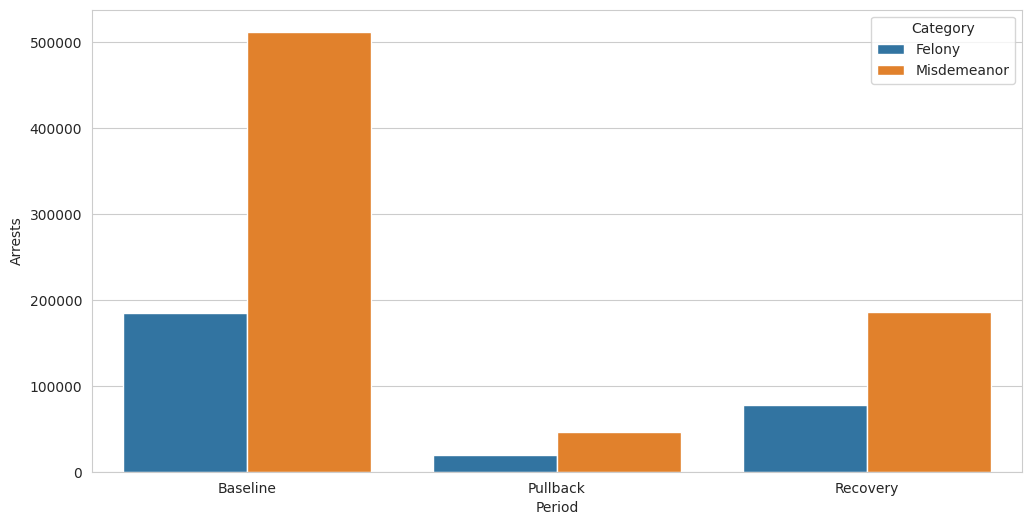

In [33]:

# Plot 1: Absolute counts by period
sns.barplot(data=plot_data, x='Period', y='Arrests', hue='Category')



<Axes: xlabel='Pct_Change', ylabel='Category'>

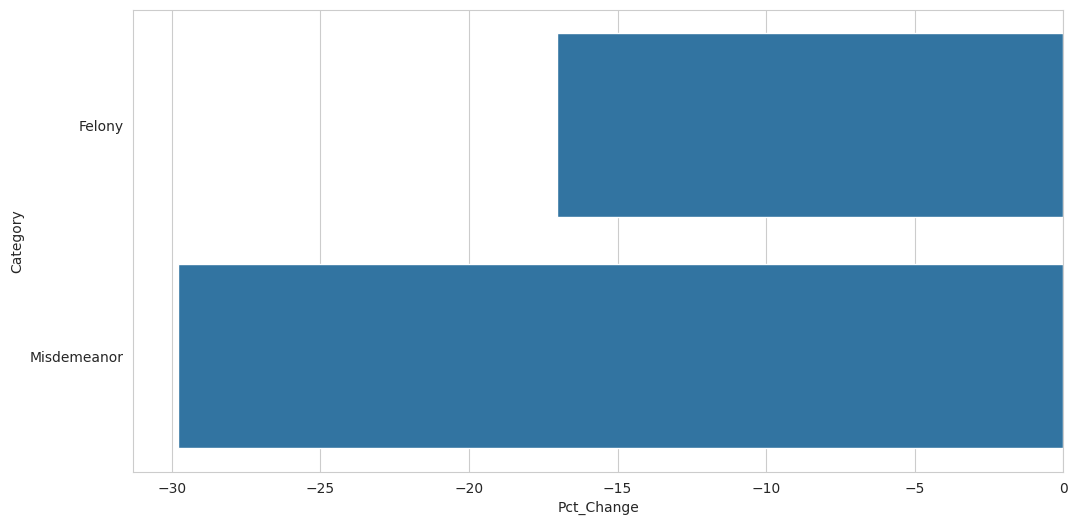

In [34]:
# Plot 2: Percentage change from baseline
pct_df = pd.DataFrame({
    'Category': ['Felony', 'Misdemeanor'],
    'Pct_Change': [felony_pct_change, misdemeanor_pct_change]
})

sns.barplot(data=pct_df, y='Category', x='Pct_Change')


**Interpretation**:
- Which type of arrest dropped more during the pullback?
- What does this tell us about discretionary vs. mandatory policing?
- Did enforcement return to baseline levels after the pullback?

---

## Hands-On Exercises: Solutions

Below are complete solutions for all Quick Checks and Exercises.

## Quick Check #1 - SOLUTION

**Task:** Extract the year, month, and day of week from ARREST_DATE.

In [35]:
# SOLUTION
# Extract date components using .dt
df['year'] = df['ARREST_DATE'].dt.year
df['month'] = df['ARREST_DATE'].dt.month
df['day_of_week'] = df['ARREST_DATE'].dt.day_name()

print("Date components extracted successfully!")
print(df[['ARREST_DATE', 'year', 'month', 'day_of_week']].head(10))

Date components extracted successfully!
  ARREST_DATE  year  month day_of_week
0  2015-12-21  2015     12      Monday
1  2015-12-17  2015     12    Thursday
2  2015-12-10  2015     12    Thursday
3  2015-12-10  2015     12    Thursday
4  2015-11-19  2015     11    Thursday
5  2015-11-07  2015     11    Saturday
6  2015-10-30  2015     10      Friday
7  2015-10-26  2015     10      Monday
8  2015-10-23  2015     10      Friday
9  2015-10-22  2015     10    Thursday


## Quick Check #2 - SOLUTION

**Task:** How many unique quarters are in the dataset?

In [36]:
# SOLUTION
df['quarter'] = df['ARREST_DATE'].dt.to_period('Q')
print(f"Unique quarters: {df['quarter'].nunique()}")
print(f"\nQuarters in dataset:")
print(sorted(df['quarter'].unique()))

# Clean up
df = df.drop(columns=['quarter'])

Unique quarters: 12

Quarters in dataset:
[Period('2013Q1', 'Q-DEC'), Period('2013Q2', 'Q-DEC'), Period('2013Q3', 'Q-DEC'), Period('2013Q4', 'Q-DEC'), Period('2014Q1', 'Q-DEC'), Period('2014Q2', 'Q-DEC'), Period('2014Q3', 'Q-DEC'), Period('2014Q4', 'Q-DEC'), Period('2015Q1', 'Q-DEC'), Period('2015Q2', 'Q-DEC'), Period('2015Q3', 'Q-DEC'), Period('2015Q4', 'Q-DEC')]


## Quick Check #3 - SOLUTION

**Task:** Filter the data for arrests that occurred in January 2015 only.

In [37]:
# SOLUTION
# Method 1: Comparison operators
jan_2015_v1 = df[(df['ARREST_DATE'] >= pd.to_datetime('2015-01-01')) &
                 (df['ARREST_DATE'] <= pd.to_datetime('2015-01-31'))]

# Method 2: .between()
jan_2015_v2 = df[df['ARREST_DATE'].between(pd.to_datetime('2015-01-01'),
                                            pd.to_datetime('2015-01-31'))]

print(f"January 2015 arrests (Method 1): {len(jan_2015_v1):,}")
print(f"January 2015 arrests (Method 2): {len(jan_2015_v2):,}")
print(f"Same result? {len(jan_2015_v1) == len(jan_2015_v2)}")

January 2015 arrests (Method 1): 23,553
January 2015 arrests (Method 2): 23,553
Same result? True


## Quick Check #4 - SOLUTION

**Task:** Calculate the percentage change in daily arrest rates from pullback to recovery.

In [38]:
# SOLUTION
# First, create the filtered datasets
baseline = df[df['ARREST_DATE'] < pullback_start]
pullback = df[df['ARREST_DATE'].between(pullback_start, pullback_end)]
recovery = df[df['ARREST_DATE'] > pullback_end]

# Calculate number of days in each period
baseline_days = (pullback_start - df['ARREST_DATE'].min()).days
pullback_days = (pullback_end - pullback_start).days + 1
recovery_days = (df['ARREST_DATE'].max() - pullback_end).days

# Calculate daily rates
baseline_daily = len(baseline) / baseline_days
pullback_daily = len(pullback) / pullback_days
recovery_daily = len(recovery) / recovery_days

# Calculate percentage change from pullback to recovery
pct_change_recovery = ((recovery_daily - pullback_daily) / pullback_daily) * 100

print(f"Daily rate during pullback: {pullback_daily:.1f} arrests/day")
print(f"Daily rate during recovery: {recovery_daily:.1f} arrests/day")
print(f"Percentage change: {pct_change_recovery:+.1f}%")

# Compare to original baseline
print(f"\nOriginal baseline: {baseline_daily:.1f} arrests/day")
print(f"Recovery as % of baseline: {(recovery_daily / baseline_daily * 100):.1f}%")

Daily rate during pullback: 734.1 arrests/day
Daily rate during recovery: 860.7 arrests/day
Percentage change: +17.2%

Original baseline: 997.6 arrests/day
Recovery as % of baseline: 86.3%


## Exercise 1: Day of Week Analysis - SOLUTION

**Task:** Calculate which day of the week has the highest average arrest count. Did this pattern change during the pullback?

In [39]:
# SOLUTION
# Group by day of week to see overall pattern
day_counts = df.groupby('day_of_week').size().sort_values(ascending=False)

print("Total arrests by day of week:")
print(day_counts)
print(f"\nHighest arrest day: {day_counts.index[0]} with {day_counts.values[0]:,} arrests")

Total arrests by day of week:
day_of_week
Wednesday    178041
Thursday     170245
Friday       163287
Tuesday      159732
Saturday     143215
Monday       110419
Sunday       101868
dtype: int64

Highest arrest day: Wednesday with 178,041 arrests



Arrests by day of week and period:
      period day_of_week  arrests
0   Baseline      Friday   112679
1   Baseline      Monday    73398
2   Baseline    Saturday    98498
3   Baseline      Sunday    68589
4   Baseline    Thursday   115856
5   Baseline     Tuesday   107290
6   Baseline   Wednesday   121043
7   Pullback      Friday    10850
8   Pullback      Monday     6844
9   Pullback    Saturday     9018
10  Pullback      Sunday     5929
11  Pullback    Thursday    11470
12  Pullback     Tuesday    10333
13  Pullback   Wednesday    11626
14  Recovery      Friday    39758
15  Recovery      Monday    30177
16  Recovery    Saturday    35699
17  Recovery      Sunday    27350
18  Recovery    Thursday    42919
19  Recovery     Tuesday    42109
20  Recovery   Wednesday    45372


<Axes: xlabel='day_of_week', ylabel='arrests'>


Interpretation: The pattern shows arrests dropped across ALL days during
the pullback, but the relative ordering (which days are busiest) stayed similar.


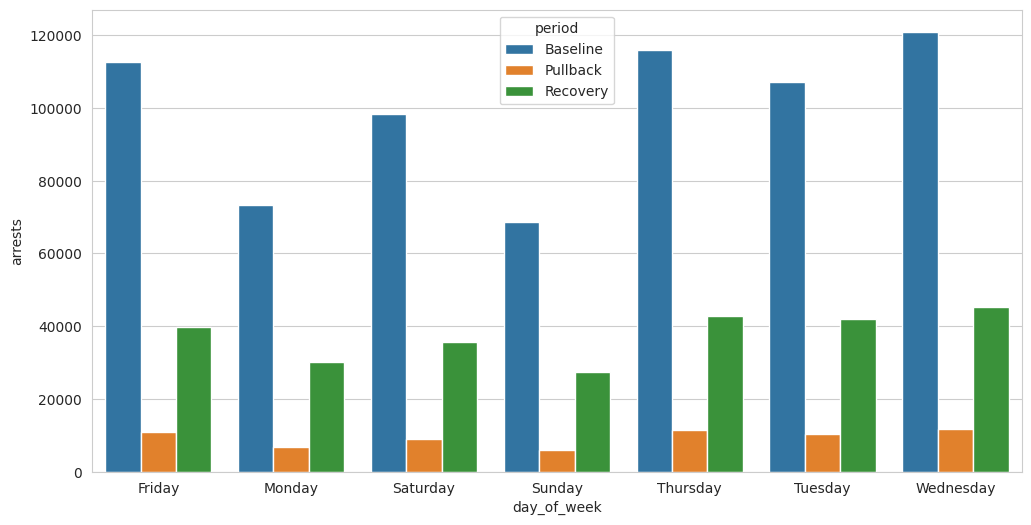

In [40]:
# Now check if the pattern changed during pullback
day_period = df.groupby(['period', 'day_of_week']).size().reset_index(name='arrests')

print("\nArrests by day of week and period:")
print(day_period)

# Visualize
sns.barplot(data=day_period,
            x='day_of_week',
            y='arrests',
            hue='period')

print("\nInterpretation: The pattern shows arrests dropped across ALL days during")
print("the pullback, but the relative ordering (which days are busiest) stayed similar.")

## Exercise 2: Quarterly Analysis - SOLUTION

**Task:** Create quarterly periods and count arrests by quarter.

Quarterly arrest counts:
   year_quarter  arrests
0    2013-01-01    91180
1    2013-04-01    93606
2    2013-07-01    90229
3    2013-10-01    85762
4    2014-01-01    91835
5    2014-04-01    94586
6    2014-07-01    91519
7    2014-10-01    76386
8    2015-01-01    75717
9    2015-04-01    79806
10   2015-07-01    82609
11   2015-10-01    73572


<Axes: xlabel='year_quarter', ylabel='arrests'>


Interpretation: The quarterly view smooths out monthly fluctuations,
making the pullback period (Q4 2014 - Q1 2015) clearly visible.


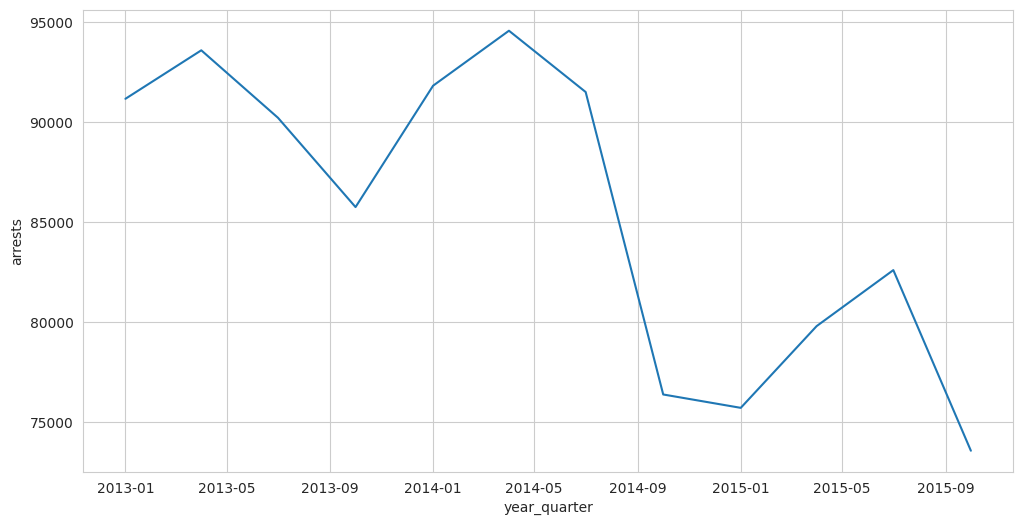

In [41]:
# SOLUTION
# Create quarterly periods and convert to timestamp for easier plotting
df['year_quarter'] = df['ARREST_DATE'].dt.to_period('Q').dt.to_timestamp()

# Count arrests by quarter
quarterly_arrests = df.groupby('year_quarter').size().reset_index(name='arrests')

print("Quarterly arrest counts:")
print(quarterly_arrests)

# Visualize the trend
sns.lineplot(data=quarterly_arrests,
             x='year_quarter',
             y='arrests')

print("\nInterpretation: The quarterly view smooths out monthly fluctuations,")
print("making the pullback period (Q4 2014 - Q1 2015) clearly visible.")

## Exercise 3: Recovery Speed - SOLUTION

**Task:** Calculate how long it took for monthly arrests to return to at least 90% of the baseline average.

In [42]:
# THIS IS AN ADVANCED 
# SOLUTION
# First, calculate baseline monthly average
baseline_monthly = baseline.groupby(baseline['ARREST_DATE'].dt.to_period('M')).size()
baseline_avg = baseline_monthly.mean()

print(f"Baseline average: {baseline_avg:.1f} arrests per month")
print(f"90% of baseline: {baseline_avg * 0.9:.1f} arrests per month")

# Calculate monthly arrests in recovery period
recovery_monthly = recovery.groupby(recovery['ARREST_DATE'].dt.to_period('M')).size().reset_index(name='arrests')
recovery_monthly.columns = ['month', 'arrests']

# Convert period to timestamp for display
recovery_monthly['month'] = recovery_monthly['month'].dt.to_timestamp()

print("\nRecovery period monthly arrests:")
print(recovery_monthly)

# Find first month that hit 90% threshold
threshold = baseline_avg * 0.9
recovery_months = recovery_monthly[recovery_monthly['arrests'] >= threshold]

if len(recovery_months) > 0:
    first_recovery_month = recovery_months.iloc[0]['month']
    months_to_recover = len(recovery_monthly[recovery_monthly['month'] < first_recovery_month])
    print(f"\nFirst month to reach 90% of baseline: {first_recovery_month.strftime('%Y-%m')}")
    print(f"Time to recovery: {months_to_recover} months after pullback ended")
else:
    print("\nArrests did not return to 90% of baseline during the recovery period.")

Baseline average: 30319.7 arrests per month
90% of baseline: 27287.7 arrests per month

Recovery period monthly arrests:
       month  arrests
0 2015-03-01    27397
1 2015-04-01    27222
2 2015-05-01    26227
3 2015-06-01    26357
4 2015-07-01    27568
5 2015-08-01    28599
6 2015-09-01    26442
7 2015-10-01    26769
8 2015-11-01    24099
9 2015-12-01    22704

First month to reach 90% of baseline: 2015-03
Time to recovery: 0 months after pullback ended


## Exercise 4: Borough Analysis - SOLUTION

**Task:** Investigate whether different boroughs experienced the pullback differently.

Arrests by borough and period:
   ARREST_BORO    period  arrests
0            B  Baseline   162143
1            B  Pullback    15701
2            B  Recovery    60961
3            K  Baseline   188499
4            K  Pullback    17377
5            K  Recovery    71210
6            M  Baseline   186416
7            M  Pullback    17571
8            M  Recovery    70635
9            Q  Baseline   134983
10           Q  Pullback    13099
11           Q  Recovery    51277
12           S  Baseline    25312
13           S  Pullback     2322
14           S  Recovery     9301

Percentage change by borough (baseline to pullback):
  Borough  Baseline_Daily  Pullback_Daily  Pct_Change
4       S       36.211731       25.800000  -28.752370
0       K      269.669528      193.077778  -28.402078
1       M      266.689557      195.233333  -26.793784
2       B      231.964235      174.455556  -24.792046
3       Q      193.108727      145.544444  -24.630830


<Axes: xlabel='Pct_Change', ylabel='Borough'>


Interpretation: All boroughs saw decreases during the pullback,
but some (like Brooklyn and Bronx) had larger decreases than others.


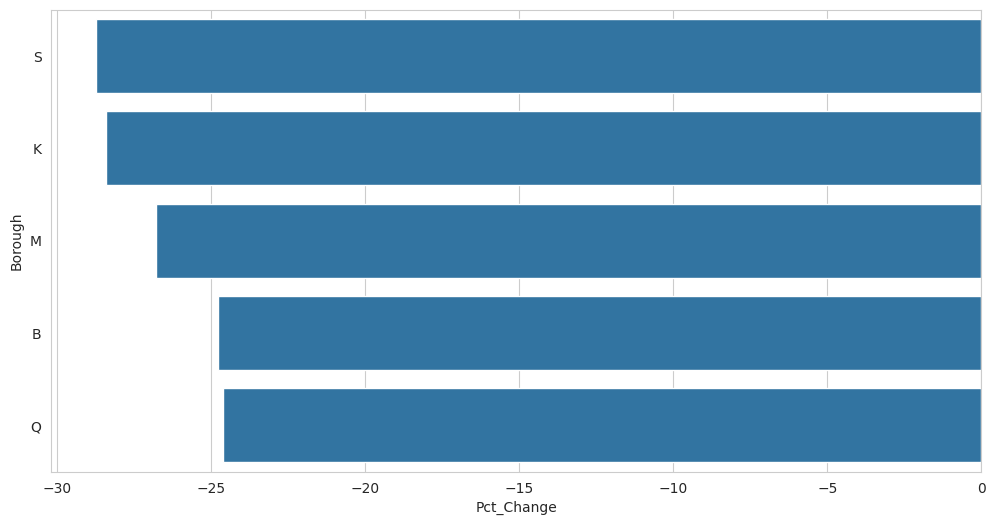

In [43]:
# SOLUTION
# Count arrests by borough and period
borough_period = df.groupby(['ARREST_BORO', 'period']).size().reset_index(name='arrests')

print("Arrests by borough and period:")
print(borough_period)

# Calculate percentage change for each borough
results = []

for borough in df['ARREST_BORO'].unique():
    # Filter to this borough
    boro_baseline = df[(df['ARREST_BORO'] == borough) & (df['period'] == 'Baseline')]
    boro_pullback = df[(df['ARREST_BORO'] == borough) & (df['period'] == 'Pullback')]
    
    # Calculate daily rates
    baseline_rate = len(boro_baseline) / baseline_days
    pullback_rate = len(boro_pullback) / pullback_days
    
    # Calculate percentage change
    pct_change = ((pullback_rate - baseline_rate) / baseline_rate) * 100
    
    results.append({
        'Borough': borough,
        'Baseline_Daily': baseline_rate,
        'Pullback_Daily': pullback_rate,
        'Pct_Change': pct_change
    })

results_df = pd.DataFrame(results).sort_values('Pct_Change')

print("\nPercentage change by borough (baseline to pullback):")
print(results_df)

# Visualize
sns.barplot(data=results_df,
            y='Borough',
            x='Pct_Change')

print("\nInterpretation: All boroughs saw decreases during the pullback,")
print("but some (like Brooklyn and Bronx) had larger decreases than others.")

## Exercise 5: Most Common Offense Descriptions - SOLUTION

**Task:** Find the top 5 most common offense descriptions for felonies and misdemeanors.

In [44]:
# SOLUTION
# Top 5 felony offense descriptions
felony_offenses = df[df['LAW_CAT_CD'] == 'F'].groupby('OFNS_DESC').size().sort_values(ascending=False)

print("Top 5 Felony Offense Descriptions:")
print(felony_offenses.head(5))

# Top 5 misdemeanor offense descriptions
misdemeanor_offenses = df[df['LAW_CAT_CD'] == 'M'].groupby('OFNS_DESC').size().sort_values(ascending=False)

print("\nTop 5 Misdemeanor Offense Descriptions:")
print(misdemeanor_offenses.head(5))

Top 5 Felony Offense Descriptions:
OFNS_DESC
DANGEROUS DRUGS            51987
FELONY ASSAULT             44086
MISCELLANEOUS PENAL LAW    36822
ROBBERY                    31766
GRAND LARCENY              27902
dtype: int64

Top 5 Misdemeanor Offense Descriptions:
OFNS_DESC
DANGEROUS DRUGS                    151426
ASSAULT 3 & RELATED OFFENSES       112144
OTHER OFFENSES RELATED TO THEFT     93532
PETIT LARCENY                       65466
VEHICLE AND TRAFFIC LAWS            64450
dtype: int64


## Exercise 6: Pullback Analysis for Specific Offense - SOLUTION

**Task:** Analyze how the most common offense changed during the pullback.

In [45]:
# SOLUTION
# Choose the most common offense from Exercise 5 (likely DANGEROUS DRUGS for felonies)
# Let's analyze the most common felony offense
most_common_felony = felony_offenses.index[0]

print(f"Analyzing: {most_common_felony}")

# Filter for this offense
offense_df = df[df['OFNS_DESC'] == most_common_felony]

# Count by period
offense_by_period = offense_df.groupby('period').size()

print(f"\nArrests for {most_common_felony} by period:")
print(offense_by_period)

# Calculate daily rates
baseline_count = offense_by_period['Baseline']
pullback_count = offense_by_period['Pullback']

baseline_rate = baseline_count / baseline_days
pullback_rate = pullback_count / pullback_days

# Calculate percentage change
pct_change = ((pullback_rate - baseline_rate) / baseline_rate) * 100

print(f"\nDaily rate during baseline: {baseline_rate:.1f} arrests/day")
print(f"Daily rate during pullback: {pullback_rate:.1f} arrests/day")
print(f"Percentage change: {pct_change:+.1f}%")

# Compare to overall average from lecture (26.4% decrease)
print(f"\nOverall average decrease was approximately 26.4%")
if abs(pct_change) > 26.4:
    print(f"{most_common_felony} dropped MORE than the overall average.")
    print("This suggests it's a more discretionary offense type.")
else:
    print(f"{most_common_felony} dropped LESS than the overall average.")
    print("This suggests it's a less discretionary offense type.")

Analyzing: DANGEROUS DRUGS

Arrests for DANGEROUS DRUGS by period:
period
Baseline    145963
Pullback     10395
Recovery     47055
dtype: int64

Daily rate during baseline: 208.8 arrests/day
Daily rate during pullback: 115.5 arrests/day
Percentage change: -44.7%

Overall average decrease was approximately 26.4%
DANGEROUS DRUGS dropped MORE than the overall average.
This suggests it's a more discretionary offense type.


## Summary

These exercises demonstrated key datetime operations:

1. **Extracting date components** using `.dt` accessor (Exercise 1)
2. **Creating time periods** with `.dt.to_period()` (Exercise 2)
3. **Filtering by date ranges** using comparison operators and `.between()` (Exercise 3)
4. **Calculating time differences** using `.days` (Exercise 3)
5. **Creating period indicators** using `.loc` assignment (Exercise 4)
6. **Grouping by multiple categories** including time periods (Exercises 1, 4, 6)

### Key Datetime Principles:

- Always convert string dates to datetime using `pd.to_datetime()`
- Use `.dt` accessor for all date operations
- Use `.to_period('M')` for proper monthly aggregation (not just `.dt.month`)
- Use `.between()` for cleaner date range filtering
- Calculate daily rates when comparing periods of different lengths
- Use percentage change formula: `((new - old) / old) * 100`

### Remember:

- Datetime operations enable before/after comparisons
- Natural experiments (like the NYPD pullback) create opportunities for causal analysis
- Different categories (boroughs, offense types) can respond differently to the same event
- Visualization helps reveal patterns that numbers alone might hide